<a href="https://colab.research.google.com/github/mullerino/Topicos-em-IA/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e Predição de Doenças Cardíacas Usando Redes Neurais

## Visão Geral

Este notebook foi desenvolvido com o objetivo de construir, treinar e otimizar um modelo de rede neural para prever a presença de doenças cardíacas em pacientes com base em diversos atributos clínicos. Utilizando a plataforma Google Colab, exploraremos as etapas de processamento de dados, modelagem e avaliação, implementando técnicas avançadas para melhorar a performance do modelo.

## Contexto

As doenças cardíacas são uma das principais causas de morte em todo o mundo, e a detecção precoce pode ser crucial para a intervenção e tratamento eficazes. Este projeto visa aplicar técnicas de aprendizado de máquina para ajudar na previsão de riscos cardíacos, utilizando um conjunto de dados que inclui informações como idade, sexo, pressão arterial, colesterol, entre outros.

## Objetivos

- **Preparar e explorar os dados**: Limpeza, normalização e análise exploratória dos dados para entender melhor as características e a distribuição.
- **Construir o modelo de rede neural**: Implementação de uma rede neural usando TensorFlow e Keras com múltiplas camadas e funções de ativação.
- **Otimização e validação do modelo**: Ajuste de hiperparâmetros, regularização e validação cruzada para evitar overfitting e garantir a generalização.
- **Avaliação do modelo**: Utilizar métricas como acurácia, precisão, recall e F1-score para avaliar o desempenho do modelo.

## Ferramentas Utilizadas

- **Python**: Linguagem de programação de alto nível com suporte extensivo para análise de dados e aprendizado de máquina.
- **TensorFlow e Keras**: Frameworks para construir e treinar modelos avançados de aprendizado de máquina.
- **Pandas e Numpy**: Bibliotecas para manipulação de dados e operações numéricas.
- **Matplotlib e Seaborn**: Bibliotecas para visualização de dados.
- **Scikit-Learn**: Utilizado para pré-processamento de dados e métricas de avaliação.

Ao final deste notebook, esperamos ter um modelo robusto capaz de prever com eficácia a presença de doenças cardíacas em potenciais pacientes, contribuindo assim para a pesquisa e prática médica na cardiologia.


### Carregando e Preparando o Dataset

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data = pd.read_csv(url, header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**age**: Idade do paciente (em anos).

**sex**: Sexo do paciente (1 = masculino, 0 = feminino).

**cp**: Tipo de dor no peito (chest pain type) (4 valores: 0 = típico angina, 1 = angina atípica, 2 = dor não anginosa, 3 = assintomática).

**trestbps**: Pressão arterial em repouso (em mm Hg).

**chol**: Colesterol sérico (em mg/dl).

**fbs**: Glicemia de jejum > 120 mg/dl (1 = verdadeiro, 0 = falso).

**restecg**: Resultados do eletrocardiograma em repouso (0 = normal, 1 = anormalidade ST-T, 2 = hipertrofia ventricular esquerda provável ou definitiva).

**thalach**: Frequência cardíaca máxima alcançada.

**exang**: Angina induzida por exercício (1 = sim, 0 = não).

**oldpeak**: Depressão do ST induzida por exercício relativo ao repouso.

**slope**: Inclinação do segmento ST do pico do exercício (0 = para cima, 1 = plano, 2 = para baixo).

**ca**: Número de vasos principais (0-3) coloridos por fluoroscopia.

**thal**: Thalassemia (3 = normal, 6 = defeito fixo, 7 = defeito reversível).

**target**: Variável alvo (1 = doença cardíaca presente, 0 = doença cardíaca ausente).

In [ ]:
data = data.replace('?', np.nan)
data = data.dropna()

X = data.iloc[:, :-1].astype(float)
y = data.iloc[:, -1].astype(int)

y = (y > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Construindo o Modelo de Rede Neural

In [ ]:
# Criar o modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),  # Menor regularização
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Treinando o modelo

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, validation_data=(X_test, y_test))

Epoch 1/200
7/7 [==============================] - 1s 43ms/step - loss: 24.4593 - accuracy: 0.5362 - val_loss: 7.8522 - val_accuracy: 0.5444
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 4.3968 - accuracy: 0.5556 - val_loss: 6.3319 - val_accuracy: 0.4556
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 4.1999 - accuracy: 0.5121 - val_loss: 1.3734 - val_accuracy: 0.6667
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 2.6550 - accuracy: 0.5604 - val_loss: 1.4219 - val_accuracy: 0.6778
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 1.4601 - accuracy: 0.6377 - val_loss: 1.6505 - val_accuracy: 0.6556
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 1.4499 - accuracy: 0.6377 - val_loss: 0.9849 - val_accuracy: 0.6889
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 1.2220 - accuracy: 0.6184 - val_loss: 0.7700 - val_accuracy: 0.6778
Epoch 8/200
7/7 [====

### Avaliando o modelo

In [ ]:
# Avaliar o modelo nos dados de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

3/3 [==============================] - 0s 5ms/step - loss: 0.4324 - accuracy: 0.8000
Accuracy: 80.00%


### Fazendo Previsões

In [ ]:
# Fazer previsões
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

predictions

3/3 [==============================] - 0s 3ms/step


array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.80
Precision: 0.87
Recall: 0.66
F1 Score: 0.75


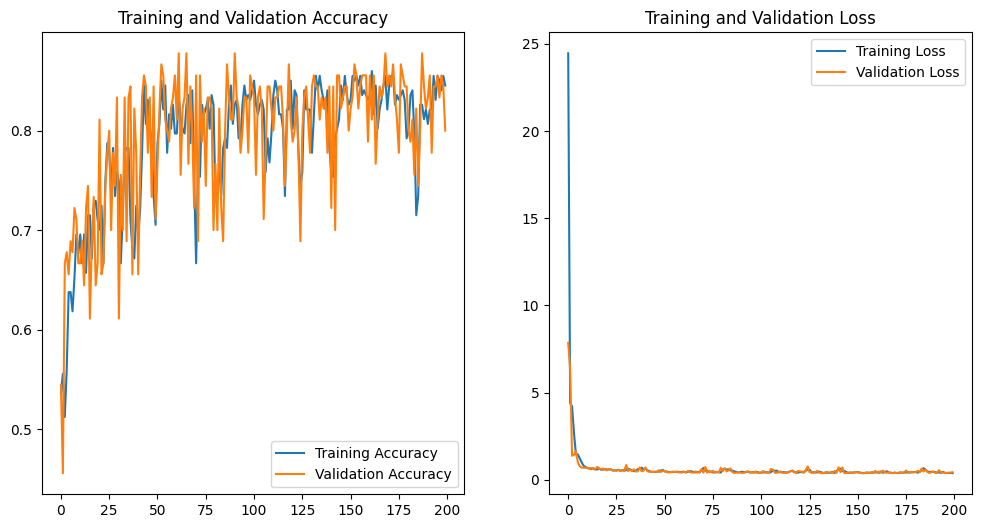

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

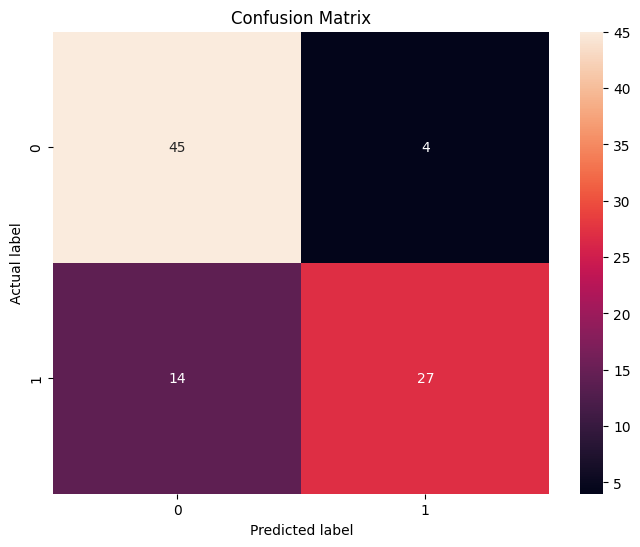

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()